<a href="https://colab.research.google.com/github/ConradKash/sunbird_tasks/blob/main/Sun_LanguageID_NLP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Extraction

In [27]:
import pandas as pd
import numpy as np
import json as js
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk; nltk.download('wordnet')
import nltk; nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter("ignore")

!wget https://raw.githubusercontent.com/SunbirdAI/salt/main/v1.2/salt-test-v1.2.jsonl

data = pd.read_json("salt-test-v1.2.jsonl", lines = True)
data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--2023-08-03 12:06:44--  https://raw.githubusercontent.com/SunbirdAI/salt/main/v1.2/salt-test-v1.2.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217596 (212K) [text/plain]
Saving to: ‘salt-test-v1.2.jsonl.1’

salt-test-v1.2.json 100%[===================>] 212.50K  --.-KB/s    in 0.03s   

2023-08-03 12:06:44 (8.13 MB/s) - ‘salt-test-v1.2.jsonl.1’ saved [217596/217596]



,text,tts-speech
0,{'eng': 'The fashion industry is starting to t...,NaN
1,{'eng': 'An epidemic is a disease that affects...,NaN
2,{'eng': 'Good quality honey will come from thi...,NaN
3,{'eng': 'She was riding the bicycle while I wa...,NaN
4,{'eng': 'The authorities are looking for two y...,NaN
...,...,...
495,{'eng': 'Developed countries have good medical...,NaN
496,{'eng': 'New Zealand has won the rugby world c...,NaN
497,{'eng': 'Most primary school teachers are not ...,NaN
498,{'eng': 'There is continued heavy gunfire in t...,NaN


# Data Preparation

In [28]:
data = data.drop('tts-speech', axis =1)
print(data)

dataset_dict = {
    "language": [],
    "text": []
}
for row in data['text']:
    for key, value in row.items():
        dataset_dict["language"].append(key)
        dataset_dict["text"].append(value)

df = pd.DataFrame(dataset_dict, columns=['language', 'text'])
df


                                                  text
0    {'eng': 'The fashion industry is starting to t...
1    {'eng': 'An epidemic is a disease that affects...
2    {'eng': 'Good quality honey will come from thi...
3    {'eng': 'She was riding the bicycle while I wa...
4    {'eng': 'The authorities are looking for two y...
..                                                 ...
495  {'eng': 'Developed countries have good medical...
496  {'eng': 'New Zealand has won the rugby world c...
497  {'eng': 'Most primary school teachers are not ...
498  {'eng': 'There is continued heavy gunfire in t...
499  {'eng': 'The little children waved at their pa...

[500 rows x 1 columns]


,language,text
0,eng,The fashion industry is starting to thrive again.
1,lug,Ekisaawe ky'emisono kitandise okusituka nate.
2,ach,Yub me cital ruk mapatpat manyen tye ka dongo ...
3,teo,Ageutu ikampunin luka enape apolo bobo.
4,lgg,Okalamvu suta o'diru 'diyini 'diyi 'ye e'do tutu
...,...,...
2995,lug,Abaana abato baawuubira bazadde baabwe emikono...
2996,ach,Lutino matino giwito cingi me moto lunyodogi k...
2997,teo,Apotu idwe iyogata auriakake nautatar alosit.
2998,lgg,Anzinyiri nde 'diyi ya dri yima tipika yini dr...



# Text Processing
Cleaning the data by removing noise




In [84]:
text = list(dataset_dict['text'])
corpus = []

def dataPro(thWord):
  rm = thWord
  thWord = thWord.lower()
  thWord = thWord.split()
  thWord = word_tokenize(str(thWord))
  thWord = ' '.join(thWord)
  return thWord

for i in range(len(text)):
    r = text[i]
    corpus.append(dataPro(r))

df['text'] = corpus


df = pd.DataFrame(df)
df.head(20)


,language,text
0,eng,"[ 'the ' , 'fashion ' , 'industry ' , 'is ' , ..."
1,lug,"[ 'ekisaawe ' , `` ky'emisono '' , 'kitandise ..."
2,ach,"[ 'yub ' , 'me ' , 'cital ' , 'ruk ' , 'mapatp..."
3,teo,"[ 'ageutu ' , 'ikampunin ' , 'luka ' , 'enape ..."
4,lgg,"[ 'okalamvu ' , 'suta ' , `` o'diru '' , `` 'd..."
5,nyn,"[ `` eby'eby'afaashoni '' , 'biriyo ' , 'nibig..."
6,eng,"[ 'an ' , 'epidemic ' , 'is ' , ' a ' , 'disea..."
7,lug,"[ 'endwadde ' , 'ebalukawo ' , `` y'endwadde '..."
8,ach,"[ 'can ' , 'mogo ' , 'obedo ' , 'two ' , 'ma '..."
9,teo,"[ 'erai ' , 'adeka ' , 'na ' , 'ikamuni ' , 'i..."


# Model Development

In [54]:
x = np.array(df["text"])
y = np.array(df["language"])

cv = CountVectorizer(analyzer = 'char',ngram_range=(2,3))
X = cv.fit_transform(x)
print(X.toarray())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=48)


logistic_regression = LogisticRegression()

#fit the model using the training data
logistic_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

print(pd.crosstab(y_test, y_pred))

[[ 0  0 16 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0 12 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]]
              precision    recall  f1-score   support

         ach       0.99      0.98      0.99       196
         eng       1.00      1.00      1.00       142
         lgg       0.99      1.00      1.00       162
         lug       0.97      0.98      0.98       170
         nyn       0.99      0.98      0.98       164
         teo       1.00      1.00      1.00       156

    accuracy                           0.99       990
   macro avg       0.99      0.99      0.99       990
weighted avg       0.99      0.99      0.99       990

col_0  ach  eng  lgg  lug  nyn  teo
row_0                              
ach    193    0    1    2    0    0
eng      0  142    0    0    0    0
lgg      0    0  162    0    0    0
lug      1    0    0  167    2    0
nyn      1    0    0    3  160    0
teo      0    0    0    0    0  156


In [82]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

def predict(ptext):
    x = cv.transform([ptext]).toarray()
    lang = model.predict(x)
    print(ptext,'is in', lang[0])

predict('Owekaa')

Owekaa is in nyn


In [36]:
new_samples = [ 'I am going to the katale', # eng
               'Ngenda mu katale', # lug
                'Uganda', # any
                'Ekikopo', # lug or nyn      #Error
                'Runyankole', # nyn or lug
                'Omuntu', # nyn or lug
                "Ebigambo by'amagezi", # lug
                "Bw'okoowa", # lug
                "yiga", # lug
                "kubivaako", # lug
                "Mulindeeko tujja kubayita", # lug
                "Gamba Mpurire" # nyn
                "Ekiro twaburayo kimwe kyonka tukajaguza embaga y'omwaka", # nyn
                "Tushangye", # nyn
                "Ekitongore ekya UWA kiriyo nikibangura abanyamakuru kuruga omukyanga ekya Kigezi ahakuhandiika amakuru agakwatiraine n’okurinda enyamaishwa z’omukishaka.", # nyn
                "itye nining", # ach
                "Irii maber, ladit?", # ach     #Error
                "Ibuto maber", # ach      #Error
                "Ibuto Gulu", # ach,
                "Amito tedo labolo kwon.", # ach
                "Ngo manyen?", # ach
                "Wacito I gang kwan nino ducu", # ach
                "Kumbedi abedo Anaka i Amuru aa ki California i Amerika ento." # ach    #Error
                ]




In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[193   0   1   2   0   0]
 [  0 142   0   0   0   0]
 [  0   0 162   0   0   0]
 [  1   0   0 167   2   0]
 [  1   0   0   3 160   0]
 [  0   0   0   0   0 156]]


In [85]:
for word in new_samples:
  predict(dataPro(word))

[ ' i ' , 'am ' , 'going ' , 'to ' , 'the ' , 'katale ' ] is in eng
[ 'ngenda ' , 'mu ' , 'katale ' ] is in lug
[ 'uganda ' ] is in nyn
[ 'ekikopo ' ] is in teo
[ 'runyankole ' ] is in lug
[ 'omuntu ' ] is in nyn
[ 'ebigambo ' , `` by'amagezi '' ] is in lug
[ `` bw'okoowa '' ] is in lug
[ 'yiga ' ] is in lug
[ 'kubivaako ' ] is in lug
[ 'mulindeeko ' , 'tujja ' , 'kubayita ' ] is in lug
[ 'gamba ' , 'mpurireekiro ' , 'twaburayo ' , 'kimwe ' , 'kyonka ' , 'tukajaguza ' , 'embaga ' , `` y'omwaka '' ] is in nyn
[ 'tushangye ' ] is in nyn
[ 'ekitongore ' , 'ekya ' , 'uwa ' , 'kiriyo ' , 'nikibangura ' , 'abanyamakuru ' , 'kuruga ' , 'omukyanga ' , 'ekya ' , 'kigezi ' , 'ahakuhandiika ' , 'amakuru ' , 'agakwatiraine ' , 'n ’ okurinda ' , 'enyamaishwa ' , ' z ’ omukishaka . ' ] is in nyn
[ 'itye ' , 'nining ' ] is in ach
[ 'irii ' , 'maber , ' , 'ladit ? ' ] is in ach
[ 'ibuto ' , 'maber ' ] is in ach
[ 'ibuto ' , 'gulu ' ] is in ach
[ 'amito ' , 'tedo ' , 'labolo ' , 'kwon . ' ] is in ach
[

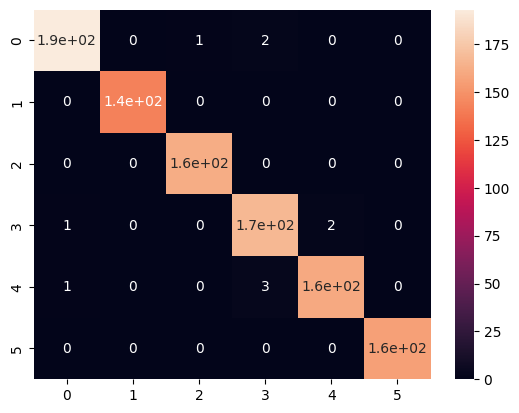

In [58]:
cm = confusion_matrix(y_test, y_pred)
# visualising the confusion matrix
plt.figure()
sns.heatmap(cm, annot = True)
plt.show()
